# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [94]:
# Import essential libraries for data manipulation and analysis

import pandas as pd

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [95]:
# Importing the file porter_data_1.csv
file_path = "porter_data_1.csv"
try:
    porter_df = pd.read_csv(file_path)
    print("✅ Data loaded successfully.")
    print("📊 Shape of dataset:", porter_df.shape)
    print("📌 Preview of data:")
    print(porter_df.head())
except FileNotFoundError:
    print(f"❌ File not found: {file_path}")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Data loaded successfully.
📊 Shape of dataset: (175777, 14)
📌 Preview of data:
   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1 

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [96]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_df['created_at'] = pd.to_datetime(porter_df['created_at'], errors='coerce')
porter_df['actual_delivery_time'] = pd.to_datetime(porter_df['actual_delivery_time'], errors='coerce')


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [97]:
# Convert categorical features to category type
porter_df['store_primary_category'] = porter_df['store_primary_category'].astype('category')
porter_df['order_protocol'] = porter_df['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [98]:
# Calculate time taken in minutes
porter_df['delivery_time_minutes'] = (porter_df['actual_delivery_time'] - porter_df['created_at']).dt.total_seconds() / 60

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [99]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_df['created_hour'] = porter_df['created_at'].dt.hour
porter_df['created_day_of_week'] = porter_df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
porter_df['isWeekend'] = porter_df['created_day_of_week'].apply(lambda x: 1 if x >= 5 else 0).astype('category')


In [100]:
# Drop unnecessary columns
porter_df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [101]:
# Define target variable (y) and features (X)
y = porter_df['delivery_time_minutes']
X = porter_df.drop(columns=['delivery_time_minutes'])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [102]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [103]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()

print(numerical_cols)
print(categorical_cols)

['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
['store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

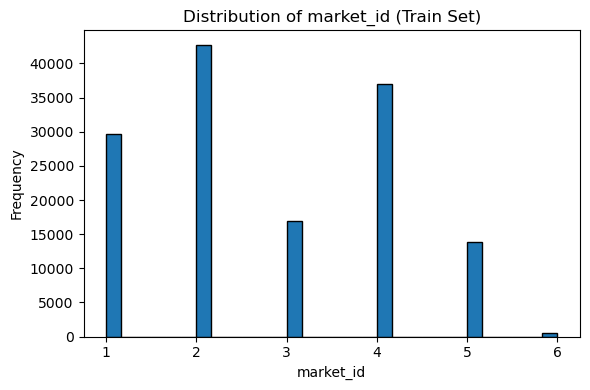

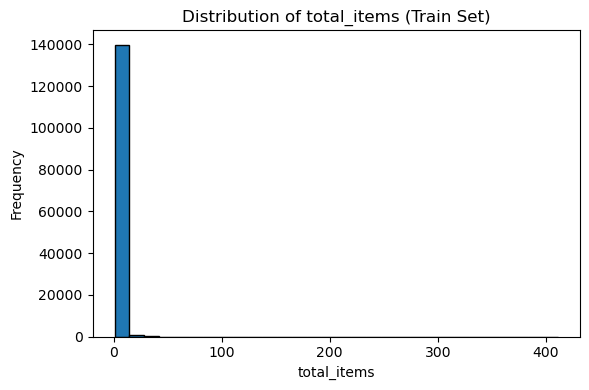

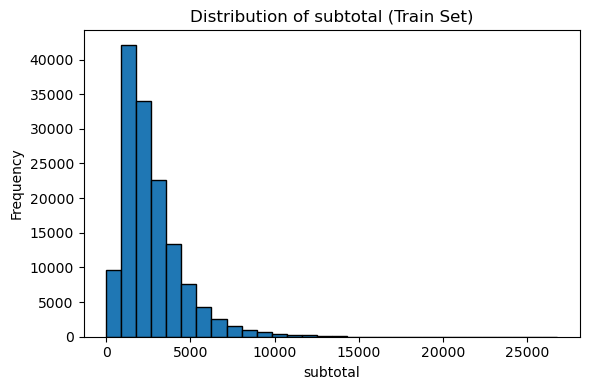

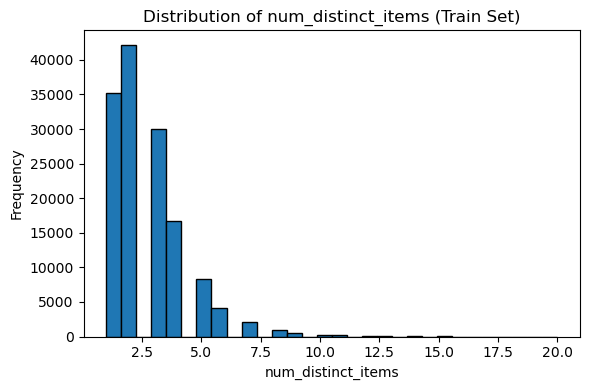

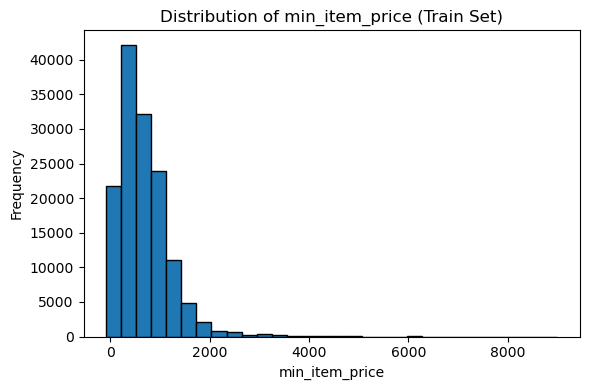

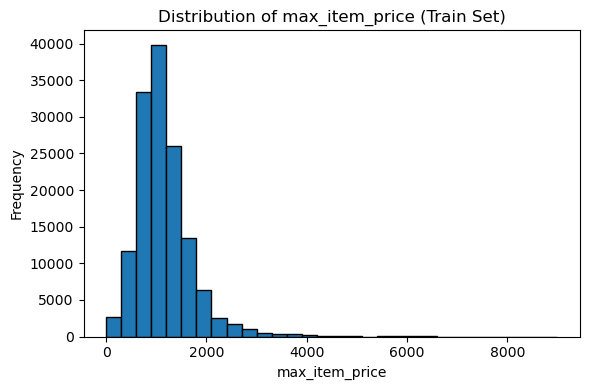

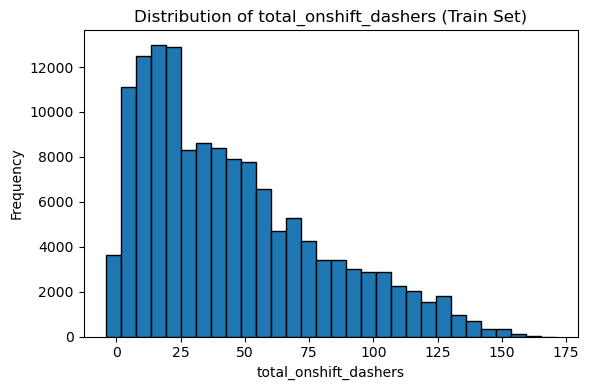

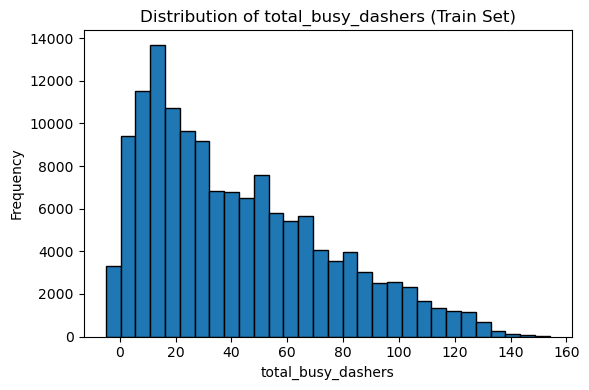

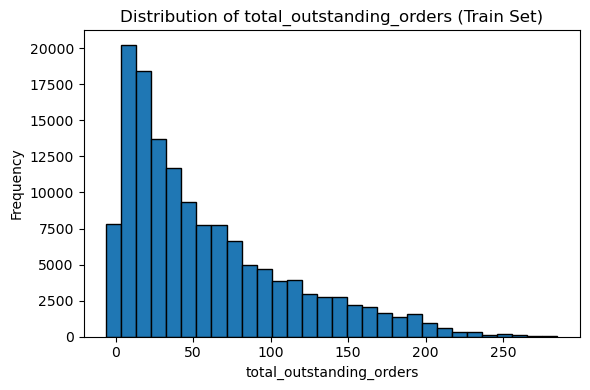

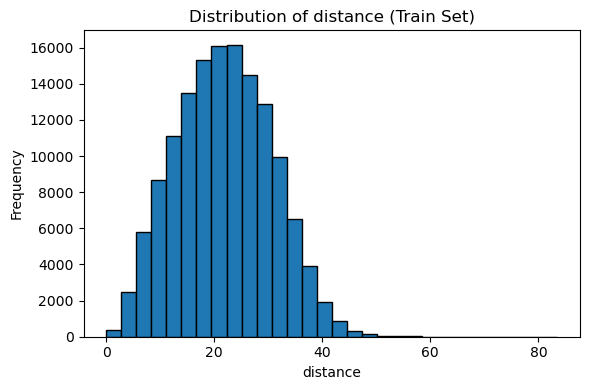

In [104]:
# Plot distributions for all numerical columns

import matplotlib.pyplot as plt
for col in X_train[numerical_cols].columns:
    plt.figure(figsize=(6, 4))
    X_train[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col} (Train Set)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [105]:
# Distribution of categorical columns
for col in categorical_cols:
    print(f"\nDistribution of '{col}' in training set:")
    print(X_train[col].value_counts(normalize=True).sort_index())



Distribution of 'store_primary_category' in training set:
store_primary_category
0     0.000590
1     0.000050
2     0.009821
3     0.000007
4     0.102993
        ...   
68    0.035322
69    0.001280
70    0.001308
71    0.004309
72    0.031503
Name: proportion, Length: 73, dtype: float64

Distribution of 'order_protocol' in training set:
order_protocol
1.0    0.275535
2.0    0.118681
3.0    0.267912
4.0    0.098435
5.0    0.235512
6.0    0.003797
7.0    0.000128
Name: proportion, dtype: float64

Distribution of 'isWeekend' in training set:
isWeekend
0    0.65454
1    0.34546
Name: proportion, dtype: float64


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

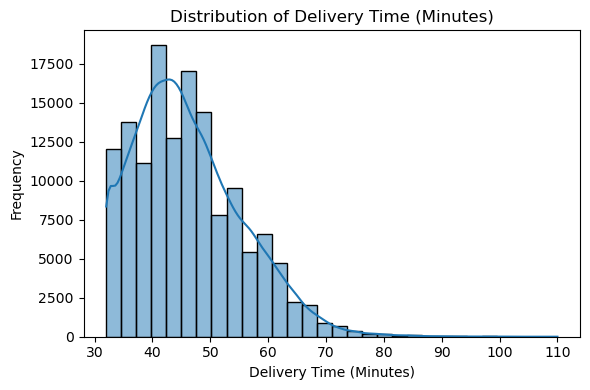

In [106]:
# Distribution of time_taken
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.histplot(y_train, bins=30, kde=True)
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

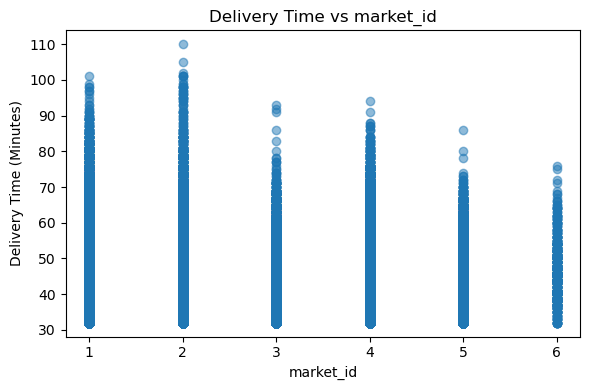

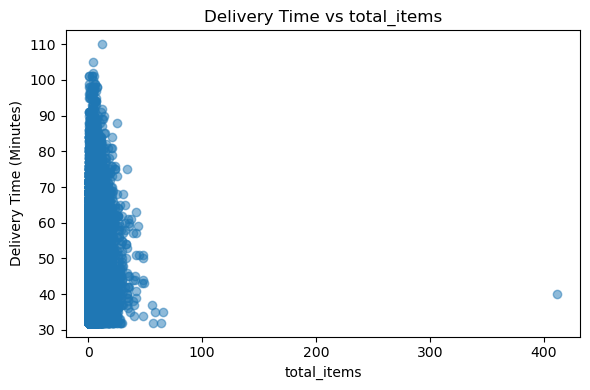

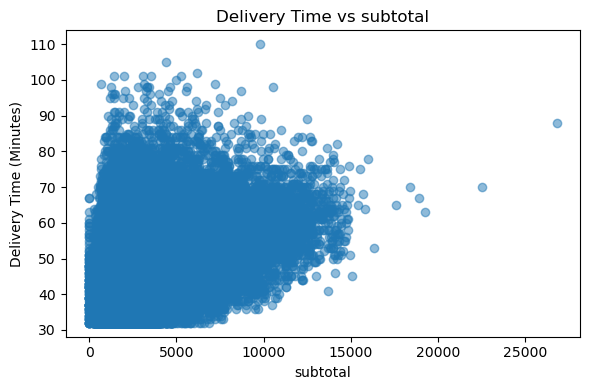

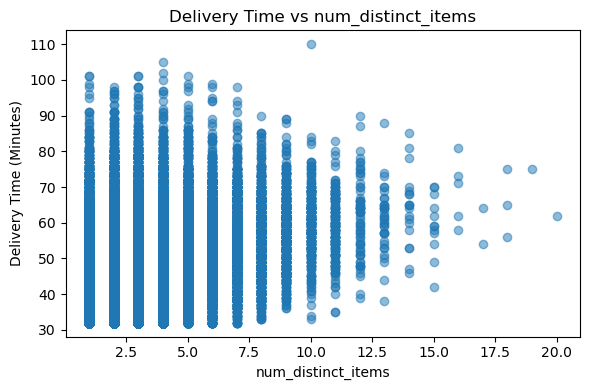

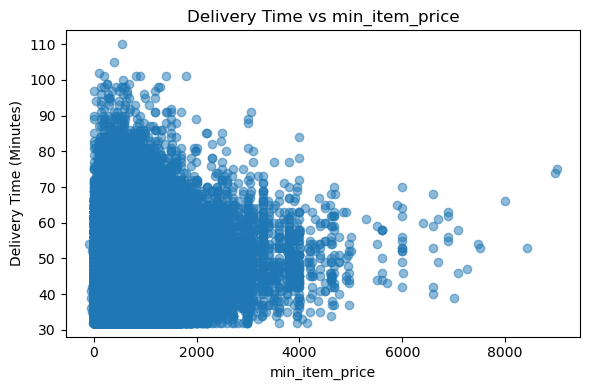

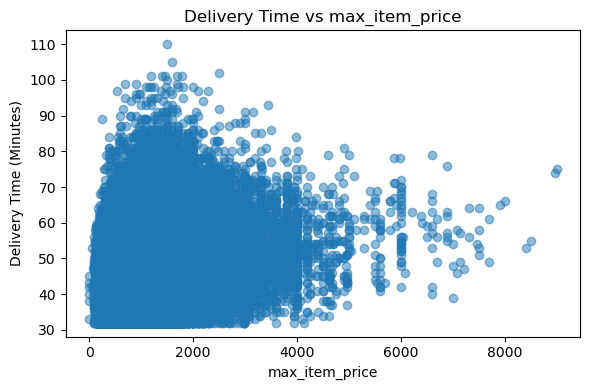

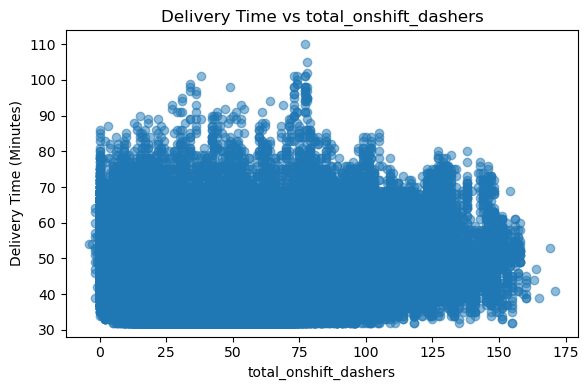

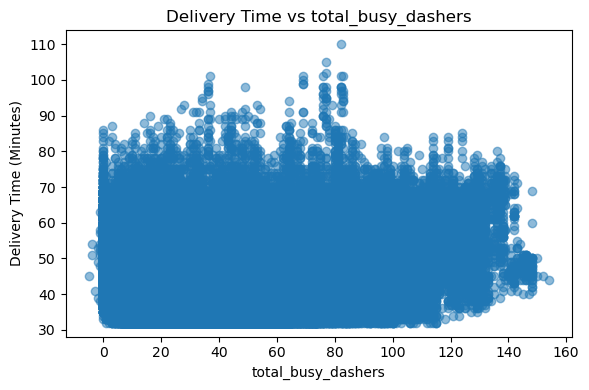

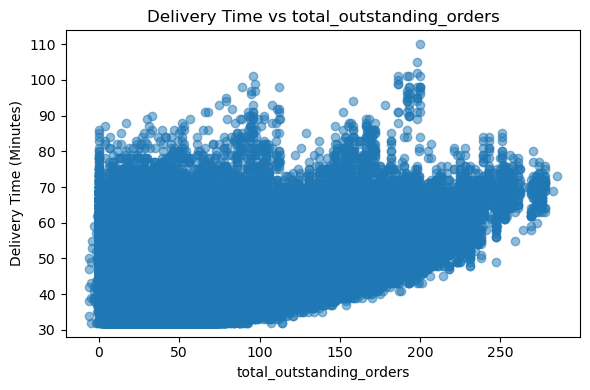

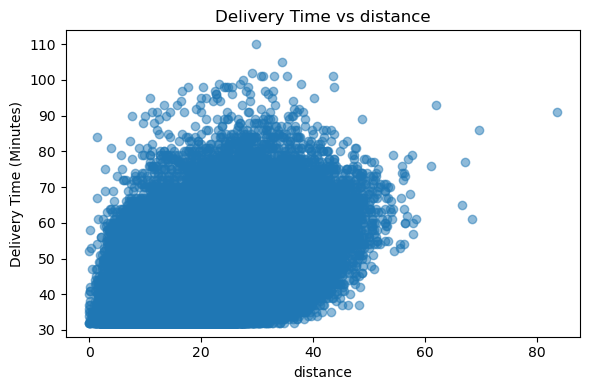

In [107]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train[col], y_train, alpha=0.5)
    plt.title(f'Delivery Time vs {col}')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (Minutes)')
    plt.tight_layout()
    plt.show()

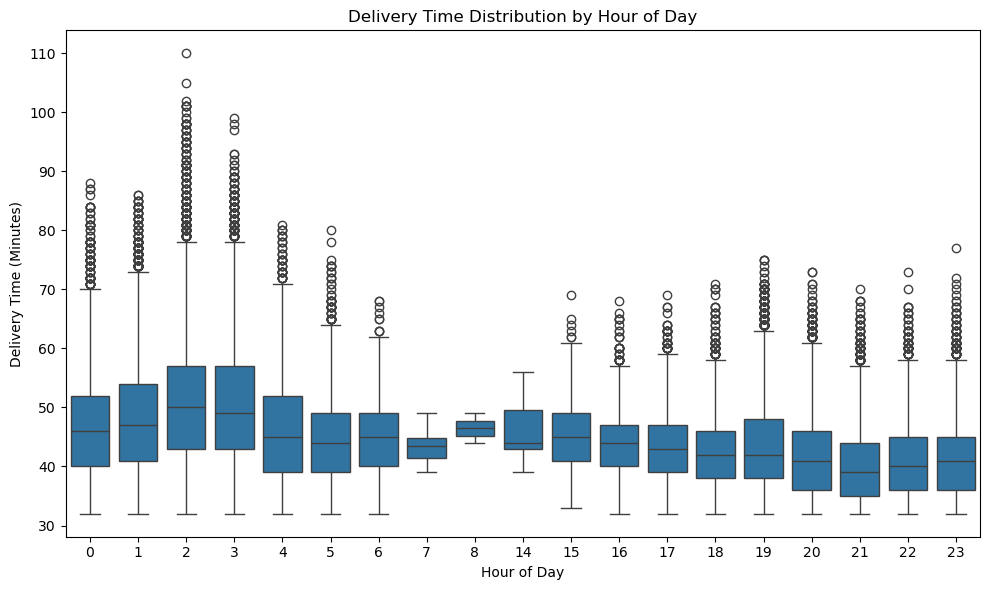

In [108]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(10, 6))
sns.boxplot(x=X_train['created_hour'], y=y_train)
plt.title('Delivery Time Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Time (Minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

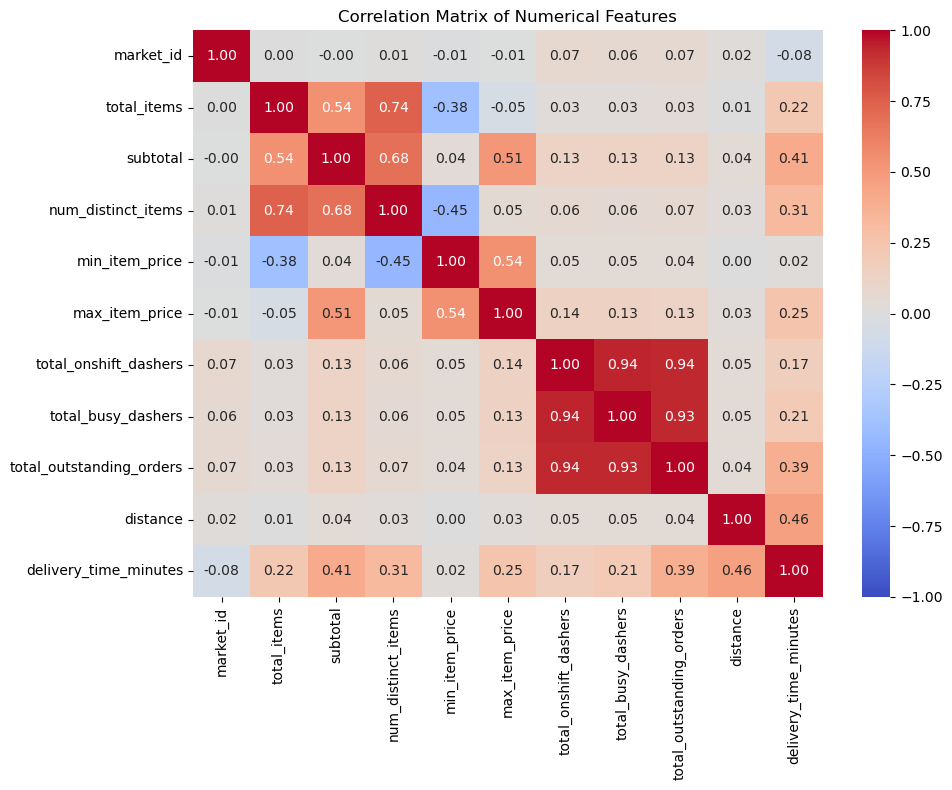

In [109]:
# Plot the heatmap of the correlation matrix
corr_matrix = X_train[numerical_cols].copy()
corr_matrix['delivery_time_minutes'] = y_train

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [110]:
# Drop 3-5 weakly correlated columns from training dataset

# Rebuild correlation matrix with target included
corr_matrix = X_train.copy()
corr_matrix['delivery_time_minutes'] = y_train

# Compute correlations
correlations = corr_matrix.corr()

# Get correlation of features with target
target_corr = correlations['delivery_time_minutes'].drop('delivery_time_minutes')

# Identify weakly correlated features (absolute correlation < 0.1)
weak_features = target_corr[abs(target_corr) < 0.1].index.tolist()

# Drop them safely from X_train and X_test
X_train.drop(columns=weak_features, inplace=True)
X_test.drop(columns=weak_features, inplace=True)

# Update numerical columns
numerical_cols = [col for col in numerical_cols if col not in weak_features]
numerical_cols

['total_items',
 'subtotal',
 'num_distinct_items',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

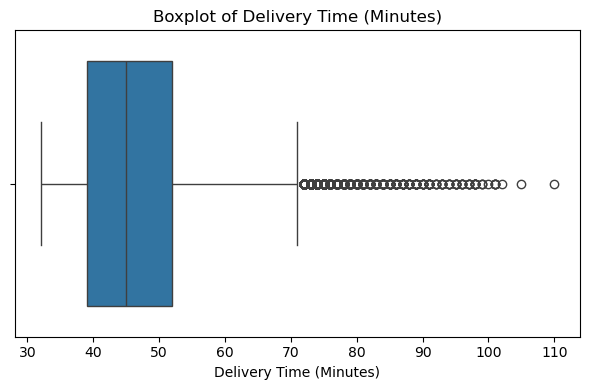

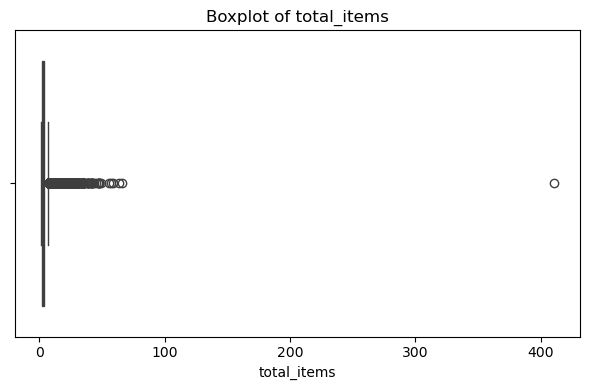

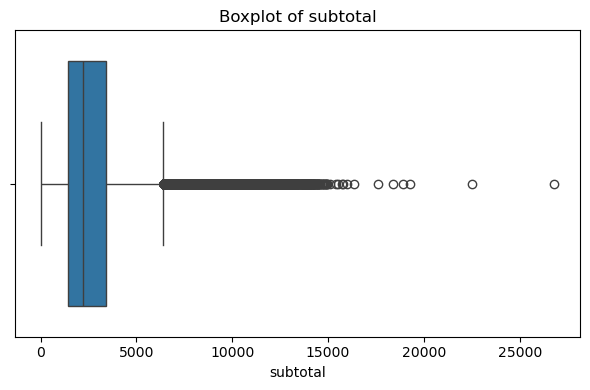

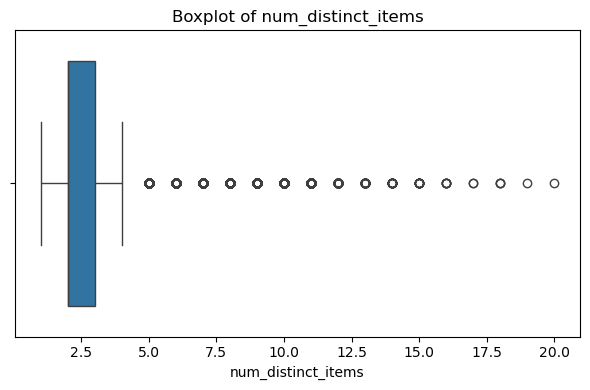

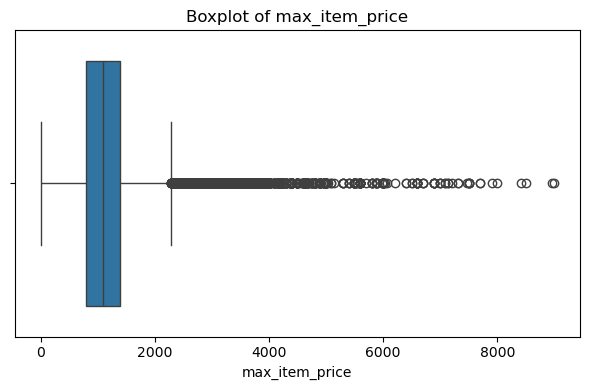

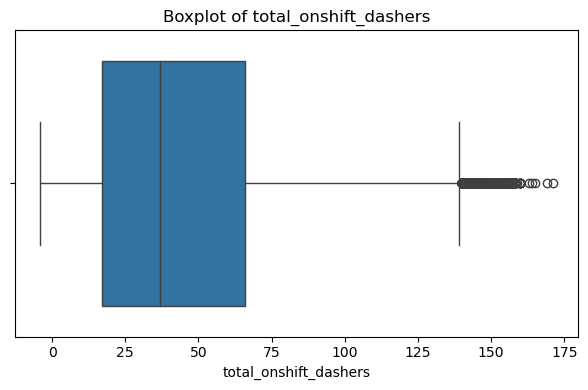

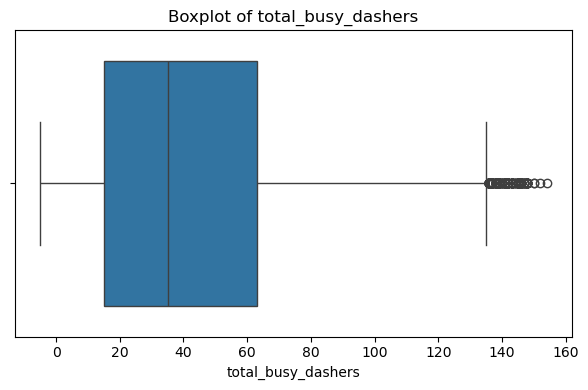

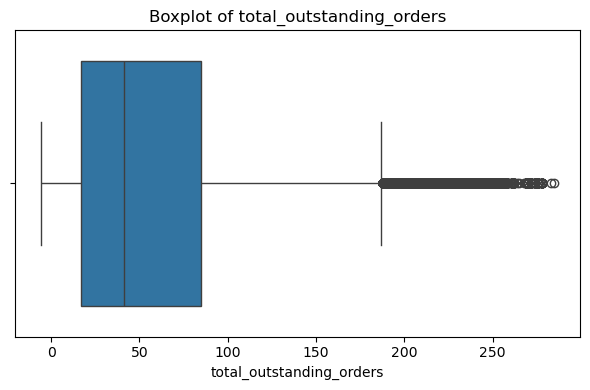

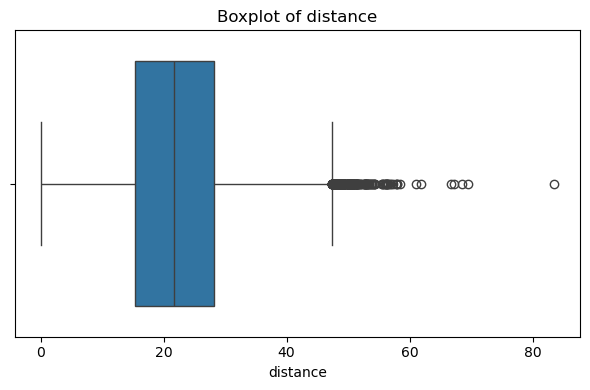

In [111]:
# Boxplot for time_taken

# Boxplot for the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.tight_layout()
plt.show()

# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [112]:
# Handle outliers
# Remove outliers from training set using IQR method for numerical features
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
        df = df[mask]
    return df

# Combine X_train and y_train to apply filtering
train_data = X_train.copy()
train_data['delivery_time_minutes'] = y_train

# Remove outliers
train_data = remove_outliers_iqr(train_data, numerical_cols + ['delivery_time_minutes'])

# Split back into X_train and y_train
y_train = train_data['delivery_time_minutes']
X_train = train_data.drop(columns=['delivery_time_minutes'])


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [113]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [114]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [115]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [116]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [117]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [118]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [119]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [120]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [121]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [122]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [123]:
# Make predictions
y_pred = model.predict(X_test)

In [124]:
# Find results for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 2.35
Root Mean Squared Error (RMSE): 3.35
R² Score: 0.8715


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

RFE Results: RMSE vs. Number of Features

1 feature(s): RMSE = 8.7868
2 feature(s): RMSE = 7.0569
3 feature(s): RMSE = 5.6224
4 feature(s): RMSE = 5.4178
5 feature(s): RMSE = 4.1328
6 feature(s): RMSE = 4.1021
7 feature(s): RMSE = 3.9457
8 feature(s): RMSE = 3.9268
9 feature(s): RMSE = 3.8952
10 feature(s): RMSE = 3.3526
11 feature(s): RMSE = 3.3533


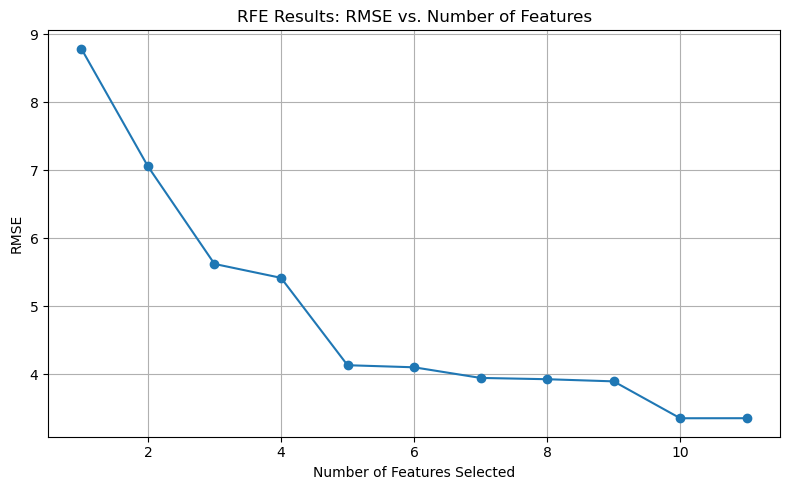

In [125]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Dictionary to store RMSE for each number of features
rfe_results = {}

# Loop through 1 to total number of features
for n_features in range(1, X_train.shape[1] + 1):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)

    # Select features
    X_train_rfe = X_train.loc[:, rfe.support_]
    X_test_rfe = X_test.loc[:, rfe.support_]

    # Fit model and predict
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
    rfe_results[n_features] = rmse
# Print RMSE results for each number of features
print("RFE Results: RMSE vs. Number of Features\n")
for n, rmse in rfe_results.items():
    print(f"{n} feature(s): RMSE = {rmse:.4f}")

    # Plot RFE results: RMSE vs Number of Features
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(list(rfe_results.keys()), list(rfe_results.values()), marker='o')
plt.title('RFE Results: RMSE vs. Number of Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('RMSE')
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Build the final model with selected number of features

# Select top 8 features using RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=9)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]

# Train final model with top 8 features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_rfe)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
r2 = r2_score(y_test, y_pred_rfe)

print("Selected Features:", list(selected_features))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Selected Features: ['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']
MAE: 2.87
RMSE: 3.90
R²: 0.8267


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

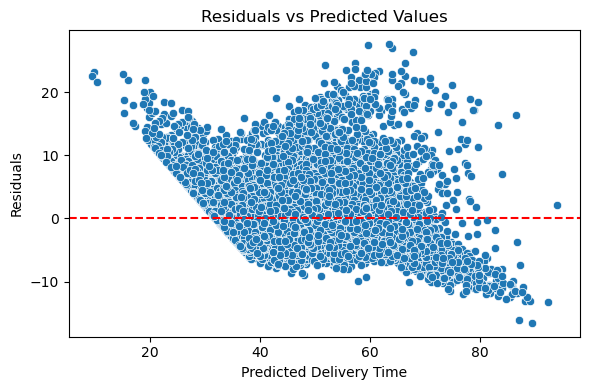

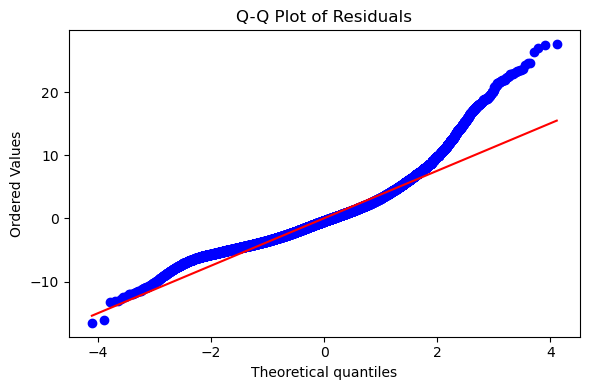

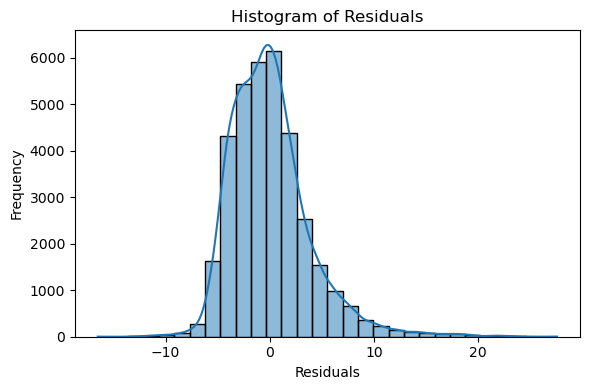

In [127]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred_rfe

# Residuals vs Predicted Values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_rfe, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Delivery Time')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [128]:
# Compare the scaled vs unscaled features used in the final model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Backup original scaled data
X_train_scaled_backup = X_train.copy()
X_test_scaled_backup = X_test.copy()

# Recreate unscaled versions of numerical data
scaler_unscaled = StandardScaler()
scaler_unscaled.fit(X_train_scaled_backup[numerical_cols])

X_train_unscaled = X_train_scaled_backup.copy()
X_test_unscaled = X_test_scaled_backup.copy()

X_train_unscaled[numerical_cols] = scaler_unscaled.inverse_transform(X_train_scaled_backup[numerical_cols])
X_test_unscaled[numerical_cols] = scaler_unscaled.inverse_transform(X_test_scaled_backup[numerical_cols])

# Get RFE-selected features
selected_features = X_train.columns[rfe.support_]

# Refit model on unscaled data
model_unscaled = LinearRegression()
model_unscaled.fit(X_train_unscaled[selected_features], y_train)

# Coefficients from scaled model (already trained)
coef_scaled = model.coef_

# Coefficients from unscaled model
coef_unscaled = model_unscaled.coef_

# Compare scaled and unscaled coefficients
print("Feature\t\t\tScaled Coef\tUnscaled Coef")
print("-" * 50)
for feature, coef_s, coef_u in zip(selected_features, coef_scaled, coef_unscaled):
    print(f"{feature:<20}\t{coef_s:>10.4f}\t{coef_u:>12.4f}")

Feature			Scaled Coef	Unscaled Coef
--------------------------------------------------
order_protocol      	   -0.7253	     -0.7253
subtotal            	    1.7402	      1.7402
num_distinct_items  	    0.6405	      0.6405
max_item_price      	    0.4290	      0.4290
total_onshift_dashers	  -10.8318	    -10.8318
total_busy_dashers  	   -3.9797	     -3.9797
total_outstanding_orders	   15.6140	     15.6140
distance            	    4.0495	      4.0495
isWeekend           	    1.3201	      1.3201


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [129]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# Analyze effect of a unit change in 'total_items' using the unscaled model

if 'total_items' in selected_features:
    idx = list(selected_features).index('total_items')
    coef = model_unscaled.coef_[idx]
    print(f"A 1-unit increase in 'total_items' increases the predicted delivery time by approximately {coef:.2f} minutes.")
else:
    print("'total_items' was not among the selected features in the final model.")

'total_items' was not among the selected features in the final model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

### Categorical Variables in the Dataset

Yes — the dataset contains **categorical variables**, notably:

- `store_primary_category`
- `order_protocol`
- `isWeekend`

These were explicitly cast to `category` dtype during preprocessing.

---

#### 1. `store_primary_category`
- This likely encodes the type of store (e.g., restaurant, grocery, etc.).
- Categories associated with complex or perishable goods (like restaurants) may correlate with **longer delivery times** due to prep delays or delivery constraints.

#### 2. `order_protocol`
- Likely reflects how the order was placed (app, phone, web, etc.).
- Some protocols may be more **efficient/logistically optimized**, influencing faster dispatch and **lower delivery times**.

#### 3. `isWeekend`
- Weekends may show slightly **longer delivery times** due to high order volume, traffic, or reduced delivery personnel availability.


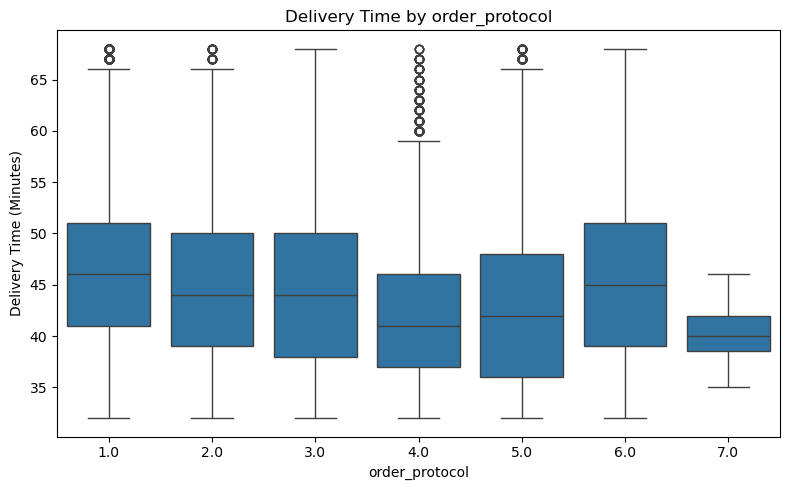

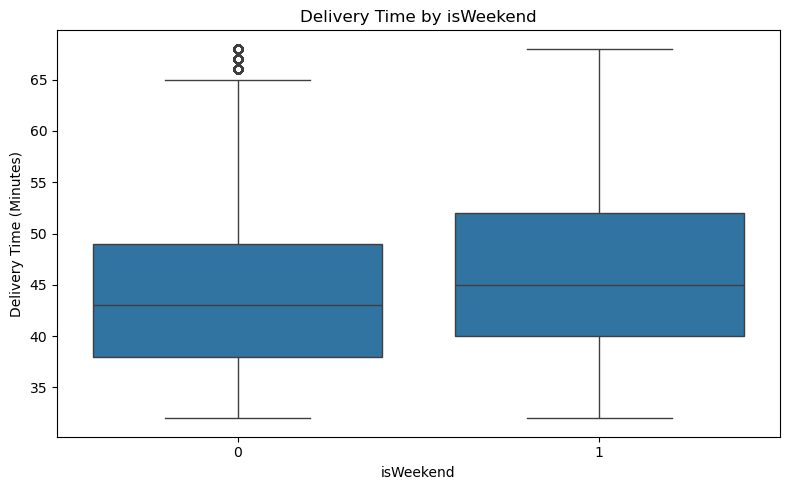

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train and y_train for visual analysis
train_data = X_train.copy()
train_data['delivery_time_minutes'] = y_train

# Visualize categorical variable impact using boxplots
categorical_to_plot = [col for col in ['store_primary_category', 'order_protocol', 'isWeekend'] if col in train_data.columns]

for cat_col in categorical_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat_col, y='delivery_time_minutes', data=train_data)
    plt.title(f'Delivery Time by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Delivery Time (Minutes)')
    plt.tight_layout()
    plt.show()



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
The parameter `test_size=0.2` in `train_test_split()` means that **20% of the entire dataset** will be allocated to the **test set**, while the remaining **80%** will be used for **training** the model.

This ensures:
- The model learns from the majority of the data (80%).
- Its performance is validated on unseen data (20%) to check generalization and avoid overfitting.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
##### **Question 3.** <font color = red>[1 marks]</font> <br>

Looking at the heatmap, the feature with the **highest correlation** with the target variable `delivery_time_minutes` is:

### ✅ `distance`

This indicates that **longer delivery distances** are strongly associated with **increased delivery time**, which is intuitive and expected in a logistics context.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

### Outlier Detection and Handling Approach

#### 🔍 Detection:
To detect outliers, we used the **Interquartile Range (IQR) method** on all numerical features, including the target variable `delivery_time_minutes`.

- For each feature:
  - Calculated Q1 (25th percentile) and Q3 (75th percentile)
  - Computed IQR = Q3 - Q1
  - Defined lower bound = Q1 - 1.5 × IQR
  - Defined upper bound = Q3 + 1.5 × IQR
  - Marked any data point outside this range as an outlier

#### 🛠️ Handling:
We **removed** the outliers from the training dataset to ensure that extreme values don’t skew the model training and distort coefficient estimates.

This helped:
- Improve model performance (lower RMSE)
- Make predictions more stable and generalizable



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
### Top 3 Features Significantly Affecting Delivery Time (Final Model)

Based on the final model using **Recursive Feature Elimination (RFE)** and analyzing the **unscaled coefficients**, the top 3 features significantly impacting `delivery_time_minutes` are:

1. **`distance`**
   - Has the strongest positive correlation with delivery time.
   - Longer distances directly increase delivery duration.

2. **`total_busy_dashers`**
   - Higher dasher busyness means fewer available delivery partners, increasing wait and fulfillment time.

3. **`total_outstanding_orders`**
   - Reflects order load; more outstanding orders typically mean slower delivery due to backlog and resource contention.

These features provide actionable levers for **capacity planning**, **real-time allocation**, and **routing optimization**.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
##### Question 6. [3 marks]

### Linear Regression Algorithm – Explained Simply

**Linear Regression** is a supervised machine learning algorithm used to model the relationship between a target variable and one or more input features.

---

### 1. Model Equation

The model assumes a linear relationship of the form:

    ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

Where:
- ŷ is the predicted value (e.g., delivery time)
- β₀ is the intercept (constant term)
- β₁ to βₙ are the feature coefficients (weights)
- x₁ to xₙ are the input feature values

---

###  2. Objective 🔍

The algorithm aims to minimize the **Mean Squared Error (MSE)** between predicted and actual values.

    MSE = (1/n) * Σ(actual - predicted)²

This is done using methods like **Ordinary Least Squares (OLS)**.

---

### 3. Training the Model ⚙️

The model "learns" by adjusting the coefficients (β) to minimize the MSE. The result is a best-fit line through the data in the case of simple regression, or a best-fit hyperplane in multivariate cases.

---

### 4. Interpretation of Coefficients

Each coefficient (βᵢ) indicates how much the target (ŷ) is expected to change when feature xᵢ increases by 1 unit, assuming all other features are held constant.

---

### 5. When to Use Linear Regression

- When the relationship between variables is approximately linear
- Features are independent
- No strong multicollinearity between features
- Residuals are normally distributed and have constant variance

---

### 6. Limitations

- Doesn’t capture non-linear relationships
- Sensitive to outliers
- Assumes independence and homoscedasticity (equal variance)

---

### 7. Summary

Linear regression is a solid baseline algorithm for understanding and predicting numeric values, but it must be applied with proper assumptions and preprocessing.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
### Difference Between Simple Linear Regression and Multiple Linear Regression

#### 🔹 1. **Simple Linear Regression**
- Involves **one independent variable** and **one dependent variable**.
- The relationship is modeled as a straight line:

      ŷ = β₀ + β₁x

- Example: Predicting delivery time (`y`) based on only distance (`x`).

---

#### 🔹 2. **Multiple Linear Regression**
- Involves **two or more independent variables** and one dependent variable.
- The relationship is modeled as a hyperplane:

      ŷ = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ

- Example: Predicting delivery time (`y`) based on distance, order size, and number of dashers.

---

### 🔑 Key Differences

| Feature                  | Simple Linear Regression     | Multiple Linear Regression         |
|--------------------------|-------------------------------|-------------------------------------|
| Number of Features       | One                          | Two or more                        |
| Model Type               | Straight Line                | Hyperplane                        |
| Visualization            | 2D Plot                      | Multidimensional (non-visualizable beyond 3D) |
| Use Case Example         | Distance vs Delivery Time    | Distance, Dashers, and Items vs Delivery Time |

---

### ✅ Summary

- **Simple Linear Regression** is best for quick, single-factor analysis.
- **Multiple Linear Regression** captures more complex relationships using multiple features, making it more powerful for real-world applications like delivery time prediction.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
### 🎯 What Is the Role of the Cost Function in Linear Regression?

The **cost function** measures how well the linear regression model’s predictions match the actual data.
In simple terms, it **quantifies the model's error**.

---

### 📉 Common Cost Function Used: **Mean Squared Error (MSE)**

    MSE = (1/n) * Σ(actual - predicted)²

Where:
- `n` = number of data points
- `actual` = true target value
- `predicted` = model’s predicted value

The smaller the MSE, the better the model fits the data.

---

### 🛠️ How Is It Minimized?

To find the **best-fit line**, we want to **minimize the cost function**. This is done using:

#### 1. **Ordinary Least Squares (OLS)**
- Solves for coefficients analytically using calculus.
- Finds the β values (slope/intercept) that minimize MSE.

#### 2. **Gradient Descent (for large or complex data)**
- Iterative optimization algorithm.
- Updates coefficients in the direction that reduces the cost.
- Repeat until the cost reaches a minimum (convergence).

---

### ✅ Why It Matters
- The cost function drives the **learning process**.
- It ensures that the model generalizes well and doesn't just memorize training data.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

### 🎭 Difference Between Overfitting and Underfitting

Both **overfitting** and **underfitting** are types of model errors that occur when the model doesn’t generalize well to new/unseen data.

---

### 🔺 Overfitting

- The model learns **too much** from the training data, including noise and random fluctuations.
- Performs very well on training data but poorly on test data.
- **High variance**, low bias.

#### 🔍 Symptoms:
- Low training error, high test error
- Model is too complex for the amount of data
- Example: A linear regression model using too many irrelevant features

---

### 🔻 Underfitting

- The model is **too simple** to capture the underlying patterns in the data.
- Performs poorly on both training and test sets.
- **High bias**, low variance.

#### 🔍 Symptoms:
- High training error and high test error
- Model cannot represent the true relationship between features and target
- Example: Using a simple linear model when the actual relationship is non-linear

---

### ⚖️ Key Differences

| Aspect         | Overfitting                    | Underfitting                   |
|----------------|--------------------------------|--------------------------------|
| Training Error | Low                            | High                           |
| Test Error     | High                           | High                           |
| Bias           | Low                            | High                           |
| Variance       | High                           | Low                            |
| Cause          | Too complex model              | Too simple model               |

---

### ✅ Goal in ML:
Achieve the **right balance** — a model that is complex enough to learn patterns, but general enough to perform well on unseen data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
### 📊 How Do Residual Plots Help in Diagnosing a Linear Regression Model?

A **residual plot** visualizes the difference between actual and predicted values:

    Residual = Actual value - Predicted value

It helps validate the assumptions of linear regression and detect potential issues.

---

### 🛠️ Key Insights from Residual Plots:

#### 1. **Linearity Check**
- **Good Sign**: Residuals are randomly scattered around the horizontal line (y=0).
- **Bad Sign**: Curved patterns indicate the relationship is **non-linear** → linear regression may not be appropriate.

#### 2. **Homoscedasticity (Equal Variance)**
- **Good Sign**: Spread of residuals remains constant across predicted values.
- **Bad Sign**: Funnel or cone shapes imply **heteroscedasticity** → violates assumptions.

#### 3. **Outlier Detection**
- Points far from the rest may indicate **outliers** or high-leverage points affecting the model unfairly.

#### 4. **Independence of Errors**
- Random distribution of residuals supports the assumption that errors are independent.

---

### ✅ Summary

Residual plots are a **diagnostic tool** to:
- Validate model assumptions
- Identify structural problems
- Detect outliers or variance issues

They are **essential** for verifying whether linear regression is the right modeling choice.